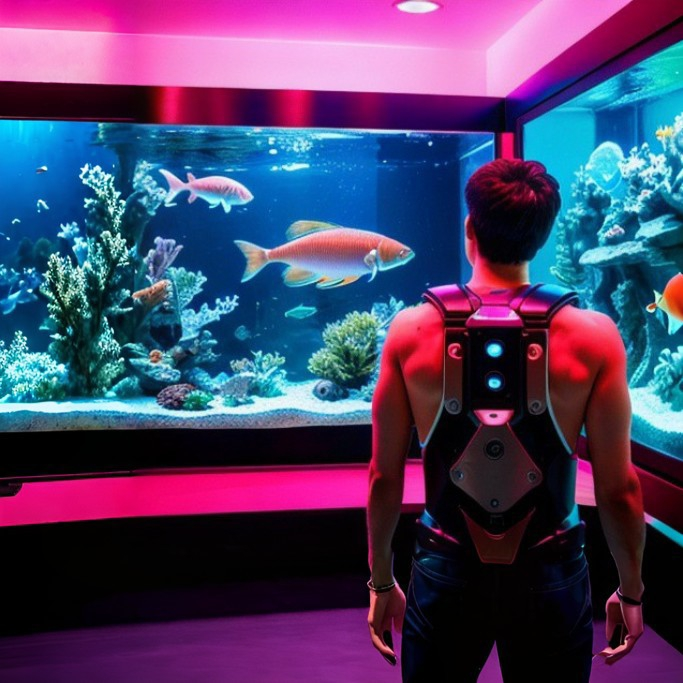


<li> BRIN, KKPGOID, BUMN
</li>

## **Mendeteksi Nama Ikan Dari Akuarium Menggunakan Dataset (micro data)**

Disini saya ari akan memberikan sample contoh (prototype) aplikasi A.I. pendeteksi nama ikan di dalam akuarium dengan data yang di peroleh dari **dataset** atau mikro data.

In [ ]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import train_test_split
from keras import backend as K

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam

## Penyisipan Path atau Direktori Objek Ikan & Pembuatan Dataset :

In [ ]:
path = '/content/drive/MyDrive/Final1'

data_listdir = os.listdir(path)

num_classes = 15

labels_name = {'Blue Betta Fish': 0,
 'Bluefin Notho': 1,
 'Boesemani Rainbow': 2,
 'Discus Fish': 3,
 'FlowerHorn': 4,
 'German Blue Rams': 5,
 'Gold Fish': 6,
 'Guppies': 7,
 'Harlequin Rasbora': 8,
 'Jack Dempsey': 9,
 'Tetra Fish': 10,
 'Tiger Barb': 11,
 'Zebra Danio': 12,
  'Angelfish':13,
  'Mollies':14}

In [ ]:
img_data_list=[]
labels_list = []

for i in data_listdir:
    img_list = os.listdir(path+'/'+i)
    print ('Loading the images of dataset-'+'{}\n'.format(i))
    label = labels_name[i]
    for img in img_list:
        input_img=cv2.imread(path + '/'+ i + '/'+ img )
        input_img=cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        labels_list.append(label)



Loading the images of dataset-Tetra Fish

Loading the images of dataset-Jack Dempsey

Loading the images of dataset-Zebra Danio

Loading the images of dataset-Harlequin Rasbora

Loading the images of dataset-Tiger Barb

Loading the images of dataset-Discus Fish

Loading the images of dataset-Gold Fish

Loading the images of dataset-Guppies

Loading the images of dataset-German Blue Rams

Loading the images of dataset-FlowerHorn

Loading the images of dataset-Blue Betta Fish

Loading the images of dataset-Boesemani Rainbow

Loading the images of dataset-Angelfish

Loading the images of dataset-Bluefin Notho

Loading the images of dataset-Mollies



In [ ]:
img_data = np.array(img_data_list)/255.0
img_data = np.reshape(img_data,(img_data.shape[0],128,128,1))
print (img_data.shape)

(1160, 128, 128, 1)


In [ ]:

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))

# convert class labels to one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([90, 79, 89, 95, 93, 84, 79, 68, 71, 77, 79, 76, 71, 47, 62]))


In [ ]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [ ]:
X_train.shape

(928, 128, 128, 1)

In [ ]:
X_test.shape

(232, 128, 128, 1)

## Pemrosesan Gambar Objek Ikan :

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
input_shape=img_data[0].shape
input_shape

(128, 128, 1)

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD


model = Sequential()



model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))








model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(256, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='softmax'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('Final_Aug1.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made
                                          # automatically depending on the quantity to monitor

In [ ]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=0.0001), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Pembuatan Argumentasi Dari Gambar Objek Ikan & Membuat Informasi Data :

In [ ]:
augmented_model_details = model.fit(datagen.flow(X_train, y_train, batch_size = 64),
                    epochs = 250, # number of iterations
                    validation_data= (X_test, y_test),
                    callbacks=[checkpoint],
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_lau

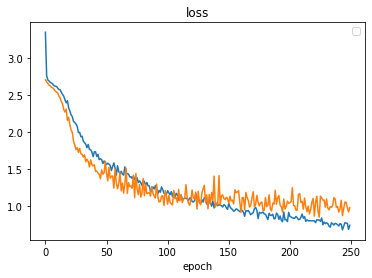

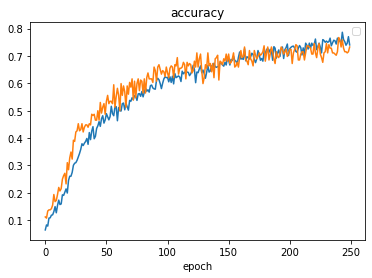

test's loss':  0.9745699167251587
accuracy:  0.732758641242981


In [ ]:
plt.figure(1)
plt.plot(augmented_model_details.history['loss'])
plt.plot(augmented_model_details.history['val_loss'])
plt.legend('training','validation')
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(augmented_model_details.history['accuracy'])
plt.plot(augmented_model_details.history['val_accuracy'])
plt.legend('training','validation')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

score = model.evaluate(X_test,y_test,verbose=0)
print("test's loss': ",score[0])
print("accuracy: ", score[1])

## Pendeteksian Objek Ikan Beserta Label Nama Objek :

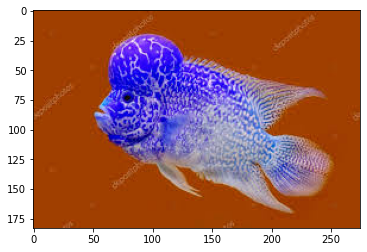

Flower Horn Fish


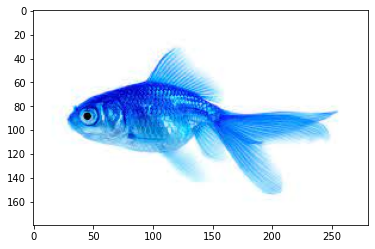

Gold Fish


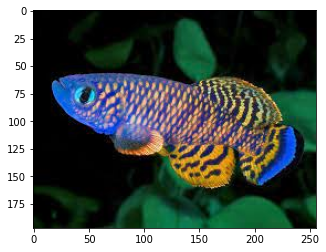

Bluefin Notho Fish


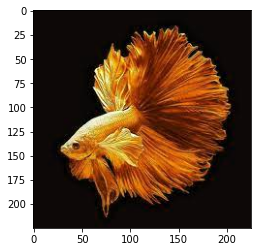

Blue Betta Fish


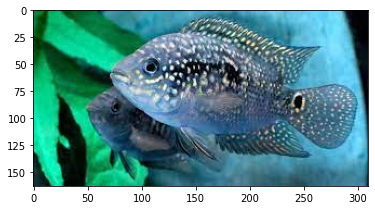

Flower Horn Fish


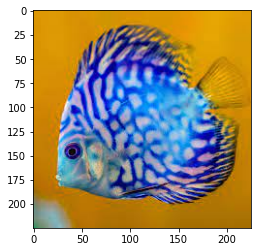

Discus Fish


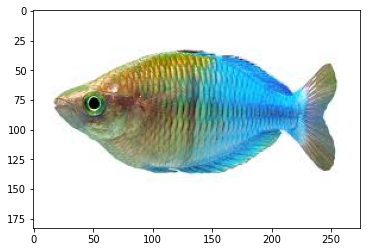

Boesemani Rainbow Fish


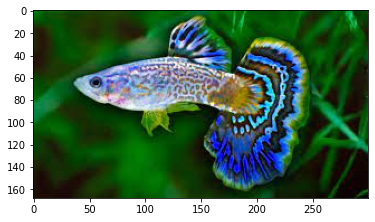

Guppy Fish


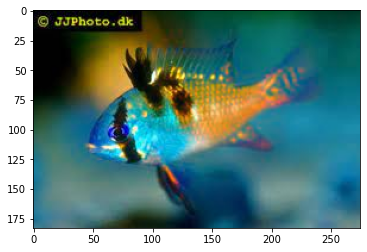

German Blue Rams


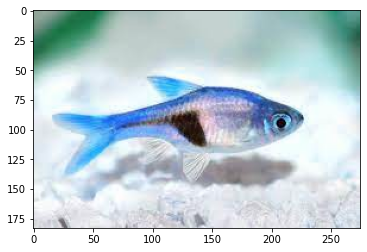

Harlequin Rasbora


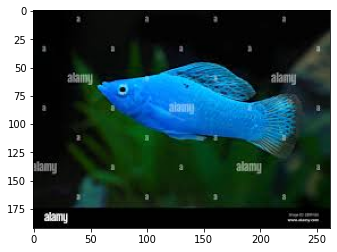

Gold Fish


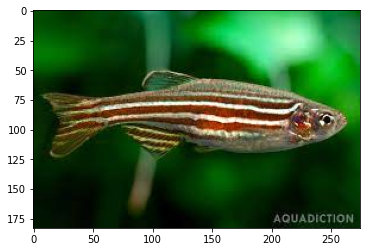

Zebra Danio


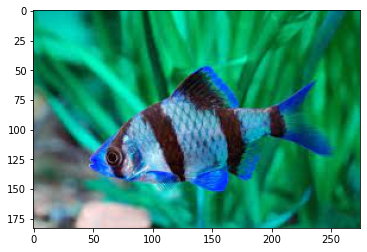

Tiger Barb


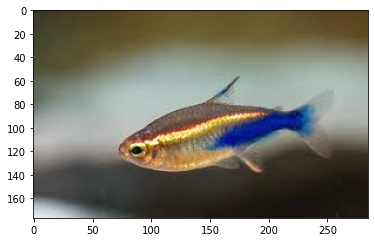

Tetra Fish


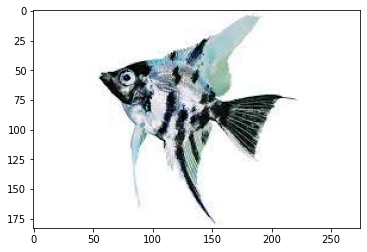

Guppy Fish


In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/Test'
model5= load_model('/content/drive/MyDrive/Final_Aug.h5')

for i in os.listdir(path):
    img = cv2.imread(path + '/'+ i)
    plt.imshow(img)
    plt.show()

    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(128,128))
    img = np.array(img)/255.0
    img = np.reshape(img,(1,128,128,1))
    plt.show()


    predict =  np.argmax(model5.predict(img))
    if predict==0:
      print('Blue Betta Fish')
    elif predict==1:
      print('Bluefin Notho Fish')
    elif predict==2:
      print('Boesemani Rainbow Fish')
    elif predict==3:
      print('Discus Fish')
    elif predict==4:
      print('Flower Horn Fish')
    elif predict==5:
      print('German Blue Rams')
    elif predict==6:
      print('Gold Fish')
    elif predict==7:
      print('Guppy Fish')
    elif predict==8:
      print('Harlequin Rasbora')
    elif predict==9:
      print('Jack Dempsey')
    elif predict==10:
      print('Tetra Fish')
    elif predict==11:
      print('Tiger Barb')
    elif predict==12:
      print('Zebra Danio')
    elif predict==13:
      print('Angelfish')
    elif predict==14:
      print('Mollies')

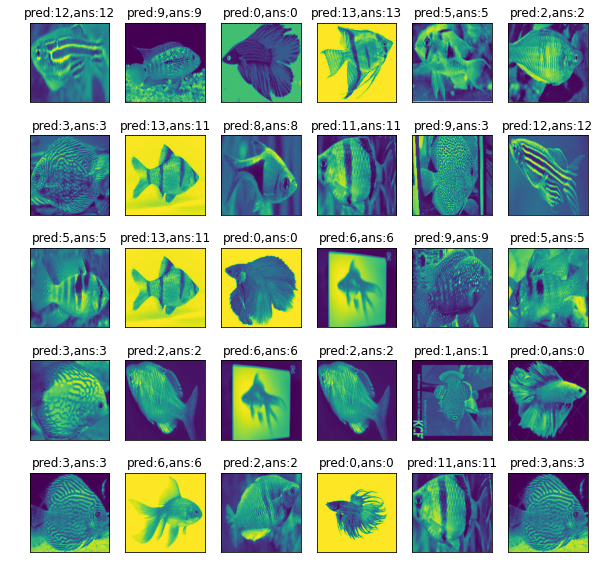

In [ ]:

predict_x=model5.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x1=np.argmax(y_test,axis=1)
plt.figure(figsize=(10,10))
for i in range(30):
    rand_num=np.random.randint(0,100)
    cifar_img=plt.subplot(5,6,i+1)
    plt.imshow(np.squeeze(X_test[rand_num]))
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)

    plt.title('pred:{0},ans:{1}'.format(classes_x[rand_num],classes_x1[rand_num]))

plt.show()

In [ ]:
target_names = ['Blue Betta Fish',
 'Bluefin Notho',
 'Boesemani Rainbow',
 'Discus Fish',
 'FlowerHorn',
 'German Blue Rams',
 'Gold Fish',
 'Guppies',
 'Harlequin Rasbora',
 'Jack Dempsey',
 'Tetra Fish',
 'Tiger Barb',
 'Zebra Danio',
'Angelfish',
'Mollies']

Confusion matrix, without normalization
[[29  1  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  2  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 15  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 12  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  7  0]
 [ 0  0  1  0  1  0  1  0  0  0  0  0  0  0  8]]


<Figure size 432x288 with 0 Axes>

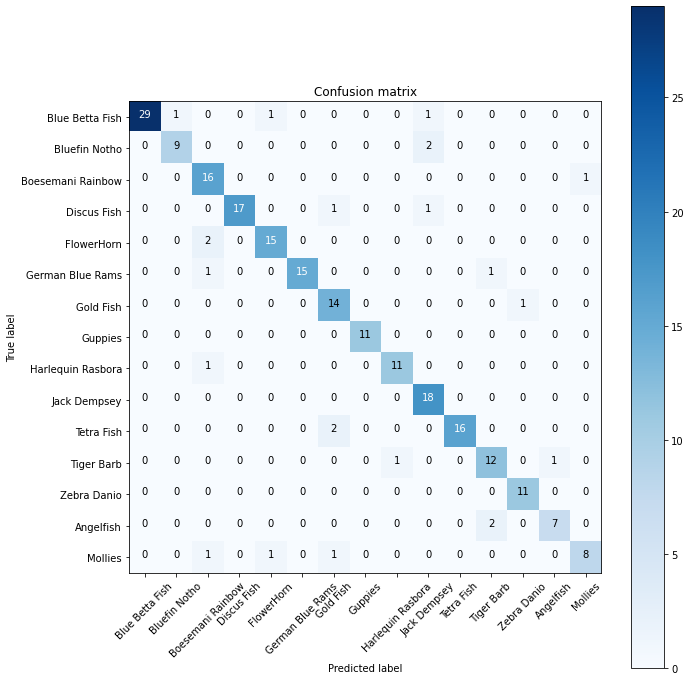

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()